# Simple Linear Regression using SkLearn

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Importing the dataset

In [2]:
df  = pd.read_excel (r'Folds5x2_pp.xlsx')

## Checking Null values

In [3]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Checking Outliers

In [4]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df1 = df[filtered_entries]

print('Length of dataset before removing outliers: %.0f' % (len(df)))
print('Length of dataset after removing outliers: %.0f' % (len(df1)))

Length of dataset before removing outliers: 9568
Length of dataset after removing outliers: 9510


## Splitting the dataset into the Training set and Test set

In [5]:
X = df1.iloc[:, 0].values
y = df1.iloc[:, -1].values

In [6]:
#Converting our input and output variable into two-dimensional
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

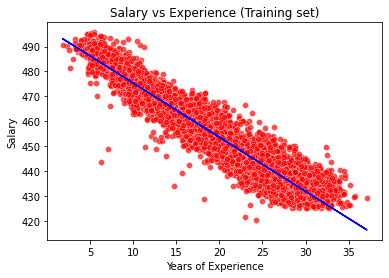

In [10]:
plt.scatter(X_train, y_train, color = 'red', edgecolors = "white", linewidths = 0.4, alpha = 0.7)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

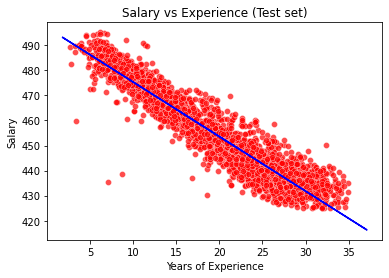

In [11]:
plt.scatter(X_test, y_test, color = 'red', edgecolors = "white", linewidths = 0.4, alpha = 0.7)
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### From the above plot, It can be seen that our model has performed well.

## Calculating R-squared and Adjusted R-squared for evaluation-

In [12]:
 from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print('R-square: %.3f'%R2)

R-square: 0.894


In [13]:
n = len(y_test)
Adjust = 1 - (((1- R2) * (n-1)) / (n-2))
print('Adjusted R-square: %.3f'%Adjust)

Adjusted R-square: 0.894


### High value of Adjusted R-squared suggests that the predictions are good